<a href="https://colab.research.google.com/github/sethorus30/Deep_Learning_NLP/blob/main/Copy_of_Deeplearning_F1_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import scipy.stats as st

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

#word cloud
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#work on the data story, what are people upset and which , focus on Navies Bayes go back to the Navies Bayes homework

In [3]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

We read in the csv with the tweets data and perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets.

We'll only keep the text column as input and the airline_sentiment column as the target.


In [ ]:
We read in the csv with the tweets data and perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets.

We'll only keep the text column as input and the airline_sentiment column as the target.

SyntaxError: ignored

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving Tweets.csv to Tweets.csv


In [5]:
#df = pd.read_csv('../input/Tweets.csv')
df = pd.read_csv('Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.head()

text airline_sentiment
6968   “@JetBlue: Our fleet's on fleek. http://t.co/g...          positive
6145   @SouthwestAir So far so good! http://t.co/16c9...          positive
13375  @AmericanAir good morning, please let me know ...           neutral
8931   @JetBlue's CEO Battles to Appease Passengers a...           neutral
11071  @USAirways should take a lesson from @Southwes...          negative

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#adjust words for how many times they appear in the document 
text = df['text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Streaming output truncated to the last 5000 lines.
@VirginAmerica announces new nonstop connecting @AUStinAirport &amp; @DallasLoveField, $39 intro: http://t.co/qXnOaQtYN8 http://t.co/JK7qmdfqgf
@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!
@JetBlue I fly w/u as much as I can, however your kiosks were broken in SYR and there was 1 woman working the ticket counter.. She had a
@SouthwestAir - I have spent 87 minutes (and counting) on hold w/ you today. After first 48 minutes, I gave up. Trying again &amp; on 43rd min.
@VirginAmerica Status match - 2 weeks have gone by and no news.Flt next week - hope flt will count towards requirement.  Cust Svc no help!!!
@AmericanAir aa employees were rude and unwilling to help. 10,000 miles is a rotten cherry on top of a dog shit Sunday. #nocareforcustomers
@USAirways It's a debit card, but I am a Dividend member

In [8]:
import re

In [9]:
search = []    
for values in df['text']:
    search.append(re.search(r'@\w+', values).group())

df['airline'] = search

In [ ]:
df #get the different twitter handles for each airline, what are the positive and negative things that are said about the airlins

text  ...      🎀
13398  @AmericanAir are you anticipating weather-reLa...  ...  False
14134  @AmericanAir i appreciate your apology. Sincer...  ...  False
5442   @SouthwestAir  If you'd love to see more girls...  ...  False
5427   @SouthwestAir There's nothing I love more than...  ...  False
3185   @united stuck on Tarmac for the last hour. Can...  ...  False
...                                                  ...  ...    ...
11574  @USAirways not even on your dime and free tick...  ...  False
13471  @AmericanAir Why did I have to stand at baggag...  ...  False
14115  @AmericanAir OMG ANSWER YOUR PHONE I HAVE BEEN...  ...  False
11128  @USAirways yes thanks I have never seen anythi...  ...  False
6094                 @SouthwestAir Fantastic! Thank you!  ...  False

[14640 rows x 10 columns]

In [10]:
df['VirginAmerica'] = df['airline'].apply(lambda x: "virginamerica" in x)

In [11]:
df['VirginAmerica'] = pd.get_dummies(df.VirginAmerica, drop_first=True)

In [ ]:
df['VirginAmerica'] = df['VirginAmerica'].astype(int)

In [12]:
df['AmericanAir'] = df['airline'].apply(lambda x: "AmericanAir" in x)

In [13]:
df['AmericanAir'] = pd.get_dummies(df.AmericanAir, drop_first=True)

In [ ]:
df['AmericanAir'] = df['AmericanAir'].astype(int)

In [14]:
df['united'] = df['text'].apply(lambda x: "united" in x)

In [15]:
df['united'] = pd.get_dummies(df.united, drop_first=True)

In [ ]:
df['united'] = df['united'].astype(int)

In [16]:
df['JetBlue'] = df['text'].apply(lambda x: "JetBlue" in x)

In [17]:
df['JetBlue'] = pd.get_dummies(df.JetBlue, drop_first=True)

In [ ]:
df['JetBlue'] = df['JetBlue'].astype(int)

In [18]:
df['usairways'] = df['text'].apply(lambda x: "usairways" in x)

In [19]:
df['usairways'] = pd.get_dummies(df.usairways, drop_first=True)

In [ ]:
df['usairways'] = df['usairways'].astype(int)

In [20]:
df['SouthwestAir'] = df['text'].apply(lambda x: "SouthwestAir" in x)

In [21]:
df['SouthwestAir'] = pd.get_dummies(df.SouthwestAir, drop_first=True)

In [ ]:
df['SouthwestAir'] = df['SouthwestAir'].astype(int)

In [24]:
df['🎀'] = df['text'].apply(lambda x: "🎀" in x)

In [23]:
pd.get_dummies(df.🎀, drop_first=True)

SyntaxError: ignored

In [25]:
df['🎀'] = df['🎀'].astype(int)

In [26]:
df['Text_Length'] = df.text.apply(lambda x: len(x))

In [27]:
df['#_capital_leters'] = df['text'].str.findall(r'[A-Z]').str.len()

In [28]:
df['percentage_of_capital_letters'] = df['#_capital_leters']/df['Text_Length']

In [29]:
df['Greater_than_50%_capital_letters'] = df['percentage_of_capital_letters'].apply(lambda x:  x>= .5 )

In [30]:
df['Greater_than_50%_capital_letters'] = df['Greater_than_50%_capital_letters'].astype(int)

In [ ]:
df['Greater_than_50%_capital_letters'] = pd.get_dummies(df.Greater_than_50%_capital_letters, drop_first=True)

AttributeError: ignored

In [31]:
df

text  ... Greater_than_50%_capital_letters
6968   “@JetBlue: Our fleet's on fleek. http://t.co/g...  ...                                0
6145   @SouthwestAir So far so good! http://t.co/16c9...  ...                                0
13375  @AmericanAir good morning, please let me know ...  ...                                0
8931   @JetBlue's CEO Battles to Appease Passengers a...  ...                                0
11071  @USAirways should take a lesson from @Southwes...  ...                                0
...                                                  ...  ...                              ...
6486   @SouthwestAir very poor customer service thru ...  ...                                0
7318   @JetBlue @julesdameron "Considering?" #Accessi...  ...                                0
12021  @AmericanAir I understand. But why is this the...  ...                                0
1869                        @united can you assign seats  ...                                0
667    @united yep that's correct, I got an email at ...  ...                                0

[14640 rows x 14 columns]

In [ ]:
df['VirginAmerica'], df['AmericanAir'], df['united'], df['JetBlue'], df['usairways'], df['SouthwestAir'], df['🎀'], df['Greater_than_50%_capital_letters'],df['reading_level']

In [32]:
pip install textstat

     |████████████████████████████████| 102kB 4.3MB/s 
     |████████████████████████████████| 1.9MB 8.9MB/s 


In [33]:
import textstat
df['reading_level'] = df['text'].apply(lambda x :textstat.flesch_reading_ease(x))

In [ ]:
df

text  ... reading_level
3480   @united The flight turned around for mechanica...  ...         57.61
10805  @USAirways - Check-in staff at PHX are awesome...  ...         56.42
5947   @SouthwestAir Report was filed but would like ...  ...         41.70
2715   @united been sitting on this plane 3:15 unreal...  ...         89.24
3101   @united #onlyinAmerica. 18 days and not a word...  ...         55.91
...                                                  ...  ...           ...
6026   @SouthwestAir @thirty_lives birthday is the 24...  ...         31.89
11499  @USAirways I've been on hold with your Dividen...  ...         72.50
3622                @united Very good flight, thank you!  ...         99.23
7142   @JetBlue I just booked a flight with you guys....  ...         70.80
4054   @united What does "Cabin Functionality" mean w...  ...         32.90

[14640 rows x 15 columns]

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text']))

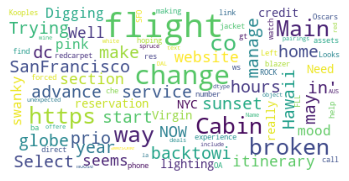

In [ ]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.loc[df['VirginAmerica']== True, 'text']))


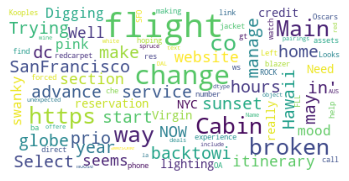

In [ ]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
wordcloud2 = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.loc[df['AmericanAir']== True, 'text']))


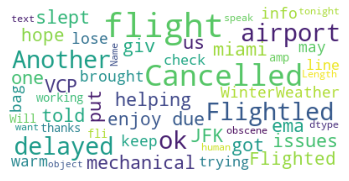

In [ ]:
print(wordcloud2)
fig = plt.figure(2)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
fig.savefig("word2.png", dpi=900)

In [ ]:
wordcloud3 = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.loc[df['united']== True, 'text']))

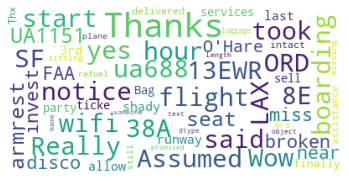

In [ ]:
print(wordcloud3)
fig = plt.figure(3)
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
wordcloud4 = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.loc[df['JetBlue']== True, 'text']))

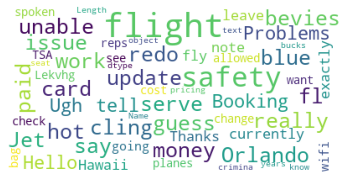

In [ ]:
print(wordcloud4)
fig = plt.figure(4)
plt.imshow(wordcloud4)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
wordcloud5 = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.loc[df['usairways']== True, 'text']))

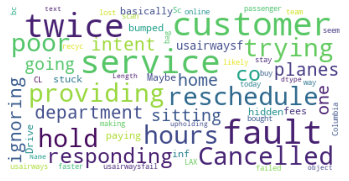

In [ ]:
print(wordcloud5)
fig = plt.figure(5)
plt.imshow(wordcloud5)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
wordcloud6 = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.loc[df['SouthwestAir']== True, 'text']))

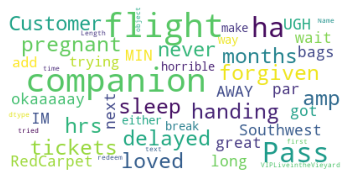

In [ ]:
print(wordcloud6)
fig = plt.figure(6)
plt.imshow(wordcloud6)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
df

text  ... SouthwestAir
10336                          @USAirways in a few weeks  ...        False
10559     @USAirways @shivadelrahim what about upgrades?  ...        False
2508   @united officially has the most inefficient bo...  ...        False
2502   @united you get a 2nd chance today as I fly to...  ...        False
13349  @AmericanAir I've been in line for over half h...  ...        False
...                                                  ...  ...          ...
14103  @AmericanAir @ezemanalyst why don't you tweet ...  ...        False
4676   @SouthwestAir A+ to the Safety Dos and Don'ts ...  ...         True
82     @VirginAmerica you're the best!! Whenever I (b...  ...        False
5382   @SouthwestAir answered. My options are a refun...  ...         True
9877   @USAirways 799 from AMS to PHL today- 3 of 4 f...  ...        False

[14640 rows x 9 columns]

 Identity matrix

'😂': 'face with tears of joy'}                                      21
{'👍': 'thumbs up'}                                                   20
{'😊': 'smiling face with smiling eyes'}                              19
{'😡': 'pouting face'}                                                16

In [ ]:
import emoji

In [ ]:
re.findall(r'[^\w\s,]', df['text'])

TypeError: ignored

In [ ]:
df

text  ... SouthwestAir
2407   @united I was insulted, disrespected and met w...  ...        False
11051  @USAirways Appreciate the calls when flight's ...  ...        False
6570   @SouthwestAir used to love you, but you keep r...  ...         True
9430   @USAirways what's the deal with flight 5268 fr...  ...        False
12406                            @AmericanAir Thank you.  ...        False
...                                                  ...  ...          ...
1046   @united nice your app says US 4972 delayed by ...  ...        False
7657   @JetBlue thanks for the response - when is the...  ...        False
9049   @USAirways any direct number to dividend miles...  ...        False
9324   @USAirways is it your practice to give 1st cla...  ...        False
13035  @AmericanAir is there a way to reserve my dog’...  ...        False

[14640 rows x 9 columns]

In [ ]:
#use a reg expression to take the @ symbol, to create a new column call airline, than use a value count 

In [ ]:
extract_emojis(df.columns)

''

In [ ]:
😂😅☀💩🙈😣🙅👀❤😆😎😥😷👌😈↔👊🙉😳💁🍷😓😋❗👸😑➡💖👉🌏👎🍸♥🍻😐😫😞😉😡📲😒🎵😠🇬🚶💕✌😪✨👺💤😜🌟💜😍👏🙏😕😬💪💔😖🚫☺👿😤⤵💙😵🚪☕🐳🐴🆖💺😦😮😱😩✈💯🎉🇧⭐👠😻✔😃🐩😁🎀😘❌😏😀🆘🇸💝⛄😊🌴😲🔵✅😔⤴🍅⌚😭❄📱🙌🎲🌞👍💗🇺👋💘😢😄

SyntaxError: ignored

In [ ]:
cnt = []
for i in df.columns:
  cnt.append(df[i].sum())


In [ ]:
cnt
#check if alpha is true, if it is false then it is a string 

['@USAirways I spent more on the room &amp; transportation then I did the whole flight@AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane@AmericanAir my key point of confusion is whether I can make this change even though the initial Flight Booking Problems was on US Airways metal?@USAirways on 5:55 flight to CTL to catch 8pm flight to sfo. But empty seats on 4:15 flight which wasn\'t offered.  Awful service continues.@USAirways please please please let my plane back to the gate so I can get off as I will miss connection due to CLT closing. 2034@united  what is the real deal with the delay on flight UA 1032 from Denver to Vegas?@united received hotel but no food.  Also email for 3750 miles.  Last trip had 3 hr delay and 5000 miles - so less for Cancelled Flightlation?@united "We like hearing from you." So why haven\'t you replied to my tweet and/or email yet? https://t.co/caf2cx3gfi@united at MSP w/

In [ ]:
😬,'👿' '😐', 😣, 💖, 😥, 💪, 👏, 🙏', '☀','👋','👊','🍅','☕','⌚','😕',🙉','🍷','😀','👠','🔵','➡','😑','😒','✌',💁','😮','😢','🍸','͡','📲', '.','😍','😭',

In [ ]:
list(df.columns)
#remove single letter strings

['text',
 'airline_sentiment',
 '🎀',
 'K',
 'm',
 '?',
 'J',
 '😬',
 'A',
 'Y',
 '_',
 '👿',
 '😐',
 '8',
 'M',
 '🇬',
 '😣',
 '°',
 '}',
 'á',
 '☺',
 '💖',
 'd',
 'é',
 '😥',
 '💪',
 'e',
 '&',
 '👏',
 '🙏',
 '☀',
 '👋',
 '👊',
 '🍅',
 '☕',
 '⌚',
 '😕',
 '”',
 '🙉',
 '🍷',
 '😀',
 '👠',
 '🔵',
 '2',
 '➡',
 '😑',
 '͜',
 ',',
 '🇸',
 '–',
 'i',
 '😒',
 '✌',
 'É',
 '’',
 '-',
 '💁',
 '😮',
 'I',
 '😢',
 '🍸',
 '͡',
 '📲',
 '.',
 '😍',
 '😭',
 '❄',
 '=',
 '💯',
 '|',
 '🇺',
 '😄',
 'E',
 '💺',
 '💤',
 '💕',
 '😊',
 '💜',
 '🎉',
 '🎲',
 'R',
 'D',
 '‘',
 '👉',
 ':',
 'w',
 '[',
 '💩',
 '⭐',
 'c',
 'G',
 'í',
 '6',
 '…',
 '👀',
 '🌞',
 '⛄',
 '👌',
 'ã',
 '😘',
 'g',
 'B',
 '😋',
 '😈',
 '^',
 '😏',
 '😲',
 '😆',
 '👸',
 '❗',
 '\xa0',
 '😜',
 '🐳',
 '✈',
 '😓',
 '😁',
 '🐩',
 '🐴',
 '“',
 '⤵',
 '%',
 't',
 '😅',
 '😂',
 '✅',
 'S',
 '⤴',
 '😞',
 '👺',
 'â',
 'y',
 '✨',
 'ê',
 '🙅',
 '✔',
 '/',
 '😩',
 'n',
 '😖',
 '\n',
 '😫',
 'v',
 '😳',
 'O',
 'P',
 '(',
 '↔',
 '🚫',
 'b',
 '🇧',
 '€',
 'U',
 '💙',
 '❌',
 'p',
 '🆖',
 '😔',
 '!',
 '😃',
 '💝',
 '😦',
 '9',
 '💔',

In [ ]:
df.value_counts()

text                                                                                                                     airline_sentiment  airline        VirginAmerica  AmericanAir  united  JetBlue  usairways  SouthwestAir  🎀    
@SouthwestAir sent                                                                                                       neutral            @SouthwestAir  False          False        False   False    False      True          False    5
@united thanks                                                                                                           positive           @united        False          False        True    False    False      False         False    5
@AmericanAir thanks                                                                                                      positive           @AmericanAir   False          True         False   False    False      False         False    5
@JetBlue thanks!                                             

In [ ]:
list(df.sum(axis=0))

['@USAirways I spent more on the room &amp; transportation then I did the whole flight@AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane@AmericanAir my key point of confusion is whether I can make this change even though the initial Flight Booking Problems was on US Airways metal?@USAirways on 5:55 flight to CTL to catch 8pm flight to sfo. But empty seats on 4:15 flight which wasn\'t offered.  Awful service continues.@USAirways please please please let my plane back to the gate so I can get off as I will miss connection due to CLT closing. 2034@united  what is the real deal with the delay on flight UA 1032 from Denver to Vegas?@united received hotel but no food.  Also email for 3750 miles.  Last trip had 3 hr delay and 5000 miles - so less for Cancelled Flightlation?@united "We like hearing from you." So why haven\'t you replied to my tweet and/or email yet? https://t.co/caf2cx3gfi@united at MSP w/

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 5910 to 6243
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
 2   airline            14640 non-null  object
 3   VirginAmerica      14640 non-null  bool  
 4   AmericanAir        14640 non-null  bool  
 5   united             14640 non-null  bool  
 6   JetBlue            14640 non-null  bool  
 7   usairways          14640 non-null  bool  
 8   SouthwestAir       14640 non-null  bool  
dtypes: bool(6), object(3)
memory usage: 543.3+ KB


In [34]:
import nltk

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [36]:
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [ ]:
wt_words = webtext.words('testing.txt')
data_analysis = nltk.FreqDist(wt_words)

OSError: ignored

In [37]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#w_tokenizer = nltk.word_tokenize
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

#df = pd.DataFrame( columns= 'text')
df['text_lemmatized'] = df.text.apply(lambda x: lemmatize_text(x))

In [ ]:
df.columns

Index(['text', 'airline_sentiment', 'airline', 'VirginAmerica', 'AmericanAir',
       'united', 'JetBlue', 'usairways', 'SouthwestAir', '🎀', 'Text_Length',
       '#_capital_leters', 'percentage_of_capital_letters',
       'Greater_than_50%_capital_letters', 'reading_level', 'text_lemmatized'],
      dtype='object')

In [ ]:
df['text_lemmatized']

3480     [@united, The, flight, turned, around, for, me...
10805    [@USAirways, -, Check-in, staff, at, PHX, are,...
5947     [@SouthwestAir, Report, wa, filed, but, would,...
2715     [@united, been, sitting, on, this, plane, 3:15...
3101     [@united, #onlyinAmerica., 18, day, and, not, ...
                               ...                        
6026     [@SouthwestAir, @thirty_lives, birthday, is, t...
11499    [@USAirways, I've, been, on, hold, with, your,...
3622           [@united, Very, good, flight,, thank, you!]
7142     [@JetBlue, I, just, booked, a, flight, with, y...
4054     [@united, What, doe, "Cabin, Functionality", m...
Name: text_lemmatized, Length: 14640, dtype: object

In [ ]:
df['text']

13013    @AmericanAir Well, you guys are totally kickin...
1620     @united been good 15yr "friendly skies" relati...
3770     @united sweet, follow back and I'll get the dm...
5351     @SouthwestAir 2 hours on hold trying to resche...
12061    @AmericanAir your planes made me miss 2 connec...
                               ...                        
8485     @JetBlue I put it my "to" and "from" airports,...
7146     @JetBlue I have a little more time then that.....
10295    @USAirways how do you do that? You guys need t...
3224     @united Doumented via link. However, now that ...
2466     @united Hate when I get bumped out of the seat...
Name: text, Length: 14640, dtype: object

In [ ]:
df.loc[df['text'].str.contains("ing"),'text']

4116     @united A 3rd party service you use to sell yo...
12348    @AmericanAir your staff at rsw working the sli...
6919     @JetBlue When chging flight, isit possible to ...
1715     @united is the stingiest airline. Nobody shoul...
7928     @JetBlue flight 348 is a freaking nightmare to...
                               ...                        
9391     @USAirways Don't blame it on weather. Rep at c...
6649     @SouthwestAir Trying to add my dog on the flig...
14484    @AmericanAir after all, the plane didn’t land ...
2346     @united Hmmm...seems like this could be someth...
5625                @SouthwestAir  I am following you now.
Name: text, Length: 6238, dtype: object

In [ ]:
df['text_lemmatized'].to_csv('name.csv', index =  False)

In [ ]:
df['text_lemmatized'][9325]

KeyError: ignored

In [ ]:
df['text']

4116     @united A 3rd party service you use to sell yo...
3539                         @united Okay, thank you both.
13783    @AmericanAir by far the best example of the wo...
12348    @AmericanAir your staff at rsw working the sli...
10333    @USAirways just hit 4hrs.  what is typical wai...
                               ...                        
5625                @SouthwestAir  I am following you now.
5856     @SouthwestAir do you have any tickets to the A...
12224    @AmericanAir I'm sure all these birds will be ...
9414     @USAirways US 728 returned to gate to get "MEL...
2052     @united 1k member broken seat back broken tv b...
Name: text, Length: 14640, dtype: object

In [ ]:
df['text_lemmatized']

4116     [@united, A, 3rd, party, service, you, use, to...
3539                   [@united, Okay,, thank, you, both.]
13783    [@AmericanAir, by, far, the, best, example, of...
12348    [@AmericanAir, your, staff, at, rsw, working, ...
10333    [@USAirways, just, hit, 4hrs., what, is, typic...
                               ...                        
5625          [@SouthwestAir, I, am, following, you, now.]
5856     [@SouthwestAir, do, you, have, any, ticket, to...
12224    [@AmericanAir, I'm, sure, all, these, bird, wi...
9414     [@USAirways, US, 728, returned, to, gate, to, ...
2052     [@united, 1k, member, broken, seat, back, brok...
Name: text_lemmatized, Length: 14640, dtype: object

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [41]:
lemmatizer=WordNetLemmatizer()
for word in df['text']:
    print(lemmatizer.lemmatize(word))

Streaming output truncated to the last 5000 lines.
@united I'm not sure you can do anything as this has been building up over time! Other than promises from your CEO service has gotten worse!
@SouthwestAir me &amp; @sammi_jon3s are best friends because of @Imaginedragons. Any chance we could get tickets to #DestinationDragons ?
@USAirways No Problem - he was the only person in the airport who would help :)
@VirginAmerica View of downtown Los Angeles, the Hollywood Sign, and beyond that rain in the mountains! http://t.co/Dw5nf0ibtr
@AmericanAir That what I hoped - contacted them 3 wks ago about this but they have not responded and still issued in US funds. #frustrated
@united UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably.
@USAirways Like I thought this was America.  When did US Airways start operating under the rules of communist Russia?
@JetBlue @NHLBruins repping the Bruins in Cleveland at Rock n Roll HOF &amp; The Christmas Story hou

In [ ]:
#first step use the hash tags to figure out the total number of airlines, second step is to take the most common word for each hashtag
for text 

Data Cleaning

In [42]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)
df.head()

text  ...                                    text_lemmatized
6968   “: Our fleet's fleek. http://t.co/g12sn5qsqZ”-...  ...  [“@JetBlue:, Our, fleet's, on, fleek., http://...
6145                 So far good! http://t.co/16c9ex79Rk  ...  [@SouthwestAir, So, far, so, good!, http://t.c...
13375   good morning, please let know able get luggag...  ...  [@AmericanAir, good, morning,, please, let, me...
8931   's CEO Battles Appease Passengers Wall Street ...  ...  [@JetBlue's, CEO, Battles, to, Appease, Passen...
11071   take lesson  wait passengers connecting fligh...  ...  [@USAirways, should, take, a, lesson, from, @S...

[5 rows x 16 columns]

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text']))

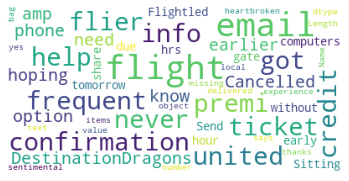

In [ ]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text']))

In [ ]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
wordcloud.gen_stylecloud(file_path= wordcloud,
                          icon_name= "fab fa-aviato")

AttributeError: ignored

In [ ]:
bookreader = stylecloud.gen_stylecloud(
                          file_path= wordcloud,
                          size = 1028,                         
                          icon_name = "fas fa-book-reader",
                          palette='colorbrewer.sequential.Blues_5',
                          background_color ='white')

AttributeError: ignored

In [ ]:
df

text  ...                                    text_lemmatized
6791   More like BaeJet Airways, amirite? “:  Right b...  ...  [More, like, BaeJet, Airways,, amirite?, “@Jet...
2776    Lindsay ??. Darn. Terrible memory part. know ...  ...  [@united, Lindsay, and, ??., Darn., Terrible, ...
2582    TAG MY OWN bags airport hoping would actually...  ...  [@united, -, after, having, to, now, TAG, MY, ...
13571   17 days since contacted customer relations......  ...  [@AmericanAir, it, now, 17, day, since, I, con...
14277                                       62 inches !?  ...                       [@AmericanAir, 62, inch, !?]
...                                                  ...  ...                                                ...
1017    Can't leave Tarmac ..united's gate agent cann...  ...  [@united, Can't, leave, the, Tarmac, ..united'...
13779             what's status flights Tuesday Dallas??  ...  [@AmericanAir, what's, the, status, of, flight...
8532        need flight ATH PDX. Do coordinate airlines?  ...  [@JetBlue, need, flight, to, ATH, from, PDX., ...
10193   Never heard back, would help: Any chance coul...  ...  [@USAirways, Never, heard, back,, but, this, w...
1864                                               thank  ...                              [@united, thank, you]

[14640 rows x 15 columns]

In [ ]:
df['reading_level']

Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, df.VirginAmerica, df.AmericanAir, df.united, df.JetBlue, df.usairways, df.SouthwestAir, df.reading_level, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

#MAKE DEEP LEARNING MODEL FOR EACH AIRLINE 

#just mentioned the features that I choose 

ValueError: ignored

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, df.VirginAmerica, df.reading_level, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]


In [ ]:
y_test

11127     neutral
12989    negative
14595    negative
2042     negative
300       neutral
           ...   
7589     positive
5242     positive
11090    negative
4087     negative
5662     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_name.predict_proba(x_test)[:, 1])

#roc_auc_score(y_test, model_name.decision_function(x_test))


NameError: ignored

Converting words to numbers

In [48]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('flight', 3532), ('not', 1437), ('no', 1364), ('get', 1216), ('t', 1085)]


In [49]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

" &amp;  best friends . Any chance could get tickets #DestinationDragons" is converted into [18, 154, 752, 238, 371, 97, 4, 222, 356]


In [50]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[18, 154, 752, 238, 371, 97, 4, 222, 356]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 9.0 features with a value of 1.


In [ ]:
y_test

13805    positive
4194     negative
12008    negative
11184     neutral
1132      neutral
           ...   
9881     negative
11082    negative
11227    negative
13079    negative
6407      neutral
Name: airline_sentiment, Length: 1464, dtype: object

Converting the target classes to numbers

In [53]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

In [54]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (1318, 10000)


Splitting of a validation set

In [58]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()
#just creating the base model , 2 layer deep learning model. 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model.predict(X_test)

ValueError: ignored

In [59]:
from sklearn.metrics import roc_auc_score

In [ ]:
prediction = deep_model.predict(features_test)

NameError: ignored

In [60]:
base_model

In [61]:
from tensorflow.keras import backend as K

In [62]:
def custom_f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [63]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=[custom_f1, 'accuracy']) #balance accur, f1 macro

                  #model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=[custom_f1, 'accuracy']) 
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [65]:
base_history = deep_model(base_model)

In [66]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()
    

e can see here that the validation loss starts to increase as from epoch 4. The training loss continues to lower, which is normal as the model is trained to fit the train data as good as possible.

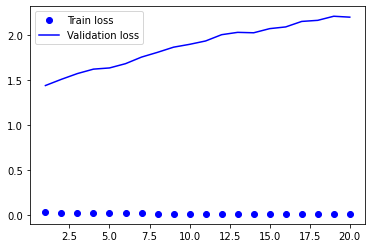

In [67]:
eval_metric(base_history, 'loss')

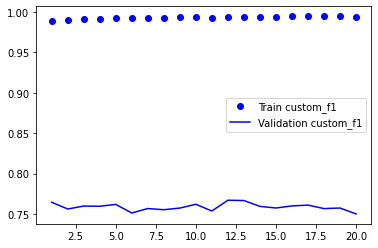

In [68]:
eval_metric(base_history, 'custom_f1')

Just as with the validation loss, the validation accuracy peaks at an early epoch. After that, it goes down slightly. So to conclude, we can say that the model starts overfitting as from epoch 4.

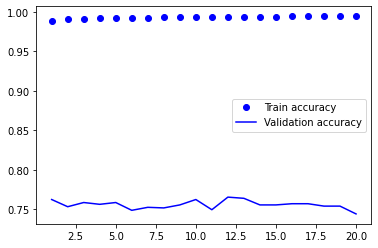

In [69]:
eval_metric(base_history, 'accuracy') 

Handling overfitting

Now, we can try to do something about the overfitting. There are different options to do that.

Option 1: reduce the network's size by removing layers or reducing the number of hidden elements in the layers
Option 2: add regularization, which comes down to adding a cost to the loss function for large weights
Option 3: adding dropout layers, which will randomly remove certain features by setting them to zero

Reducing the network's size
We reduce the network's size by removing one layer and lowering the number of hidden elements in the remaining layer to 32.

In [70]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()
#creating the reduced model was to deal with overfitting 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 99        
Total params: 320,131
Trainable params: 320,131
Non-trainable params: 0
_________________________________________________________________


In [71]:
reduced_history = deep_model(reduced_model)

In [72]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()

We can see that it takes more epochs before the reduced model starts overfitting (around epoch 10). Moreover, the loss increases much slower after that epoch compared to the baseline model.

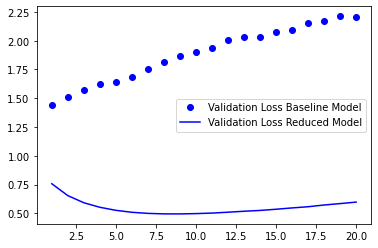

In [73]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')

Adding regularization
To address overfitting, we can also add regularization to the model. Let's try with L2 regularization.

In [74]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [75]:
reg_history = deep_model(reg_model)

For the regularized model we notice that it starts overfitting earlier than the baseline model. However, the loss increases much slower afterwards.

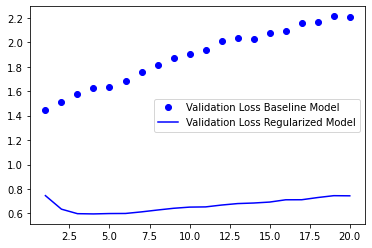

In [76]:
compare_loss_with_baseline(reg_history, 'Regularized Model')

Adding dropout layers
The last option we'll try is to add dropout layers.

In [77]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()
#the drop model and reg model and reduced model is all to deal with the overfitting 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [78]:
drop_history = deep_model(drop_model)

The model with dropout layers starts overfitting a bit later than the baseline model. The loss also increases slower than the baseline model.

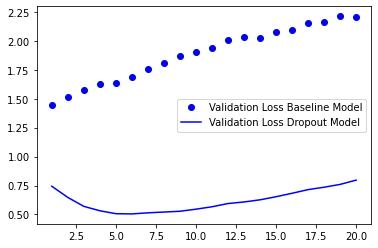

In [79]:
compare_loss_with_baseline(drop_history, 'Dropout Model')

Training on the full train data and evaluation on test data
At first sight the reduced model seems to be the best model for generalization. But let's check that on the test set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [80]:
def test_model(model, epoch_stop):
    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_oh, y_test_oh)
    
    return results

In [81]:
prediction = base_model.predict(X_test_oh)

In [82]:
roc_auc_score(y_test_oh, prediction)
#closer to 1 more accurate 

0.8554915443610219

In [83]:
from sklearn.metrics import fbeta_score

In [84]:
base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

46/46 [==============================] - 0s 2ms/step - loss: 1.3448 - custom_f1: 0.7481 - accuracy: 0.7473
/n
Test accuracy of baseline model: 74.81%


In [85]:
base_prediction = base_model.predict(X_test_oh)

In [ ]:
y_test

1243      neutral
3484     negative
7156     negative
11583    negative
12782     neutral
           ...   
7534     negative
6491     negative
11534     neutral
6801      neutral
7517     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [86]:
base_prediction # convert class probabilities into class labels

array([[9.9914730e-01, 8.5223652e-04, 4.6244151e-07],
       [9.9435908e-01, 5.6339917e-03, 6.9573425e-06],
       [3.3747151e-01, 6.3292849e-01, 2.9599926e-02],
       ...,
       [9.9999583e-01, 4.1982908e-06, 1.1877098e-08],
       [3.2830070e-05, 9.9996722e-01, 3.4691038e-11],
       [1.0000000e+00, 3.8408999e-08, 1.4491324e-13]], dtype=float32)

In [ ]:
#try to convert positive and neutral in 0 and negative into 1 

In [ ]:
probs.to.labels

NameError: ignored

In [87]:
import numpy as np
import pandas as pd
import os

from scipy.sparse import lil_matrix
from sklearn.metrics import fbeta_score


In [88]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [89]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

In [90]:
fbeta_score(y_test_oh, base_prediction_sm, average='macro', beta=0.5)

0.24574790557490778

In [91]:
from sklearn.metrics import f1_score

In [92]:
f1_score(y_test_oh, base_prediction_sm, average='macro')

0.27236554863228596

In [93]:
f1_score(y_test_oh, base_prediction_sm, average='micro')

0.6038349041273968

In [94]:
f1_score(y_test_oh, base_prediction_sm, average='weighted')

0.4936309928721957

In [95]:
base_results = roc_auc_score(y_test_oh, base_prediction)
print('/n')
print('roc_auc_score of baseline model : {0:.2f}%'.format(base_results))

/n
roc_auc_score of baseline model : 0.87%


In [96]:
import numpy as np
import pandas as pd
import os

from scipy.sparse import lil_matrix
from sklearn.metrics import fbeta_score

In [97]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [98]:
reduced_results = test_model(reduced_model, 10)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

46/46 [==============================] - 0s 1ms/step - loss: 0.7425 - custom_f1: 0.7727 - accuracy: 0.7712
/n
Test accuracy of reduced model: 77.27%


In [99]:
reduced_prediction = reduced_model.predict(X_test_oh)

In [100]:
reduced_prediction_sm = label_to_sm(labels=reduced_prediction, n_classes=3)
reduced_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [101]:
f1_score(y_test_oh, reduced_prediction_sm, average='macro')

0.25692695214105793

In [102]:
f1_score(y_test_oh, reduced_prediction_sm, average='micro')

0.6242774566473989

In [103]:
f1_score(y_test_oh, reduced_prediction_sm, average='weighted')

0.48331750423256387

In [104]:
reduced_results = roc_auc_score(y_test_oh, reduced_prediction)
print('/n')
print('roc_auc_score of reduced model: {0:.2f}%'.format(reduced_results))

/n
roc_auc_score of reduced model: 0.89%


In [105]:
reg_prediction = reg_model.predict(X_test_oh)

In [106]:
reg_prediction_sm = label_to_sm(labels=reg_prediction, n_classes=3)
reg_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [107]:
f1_score(y_test_oh, reg_prediction_sm, average='macro')

0.25692695214105793

In [108]:
f1_score(y_test_oh, reg_prediction_sm, average='micro')

0.6270491803278688

In [109]:
f1_score(y_test_oh, reg_prediction_sm, average='weighted')

0.48331750423256387

In [110]:
reg_results = roc_auc_score(y_test_oh, reg_prediction)
print('/n')
print('roc_auc_score of regularized model: {0:.2f}%'.format(reg_results))

/n
roc_auc_score of regularized model: 0.89%


In [111]:
reg_results = test_model(reg_model, 5)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))

46/46 [==============================] - 0s 2ms/step - loss: 0.7873 - custom_f1: 0.7643 - accuracy: 0.7657
/n
Test accuracy of regularized model: 76.43%


In [112]:
drop_prediction = drop_model.predict(X_test_oh)

In [113]:
drop_results = roc_auc_score(y_test_oh, drop_prediction)
print('/n')
print('roc_auc_score of dropout model: {0:.2f}%'.format(drop_results))

/n
roc_auc_score of dropout model: 0.89%


In [114]:
drop_results = test_model(drop_model, 6)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

46/46 [==============================] - 0s 2ms/step - loss: 0.8783 - custom_f1: 0.7818 - accuracy: 0.7821
/n
Test accuracy of dropout model: 78.18%


In [115]:
drop_prediction_sm = label_to_sm(labels=drop_prediction, n_classes=3)
drop_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [116]:
f1_score(y_test_oh, drop_prediction_sm, average='macro')

0.25871426223935995

In [117]:
f1_score(y_test_oh, drop_prediction_sm, average='micro')

0.6178151260504202

In [118]:
f1_score(y_test_oh, drop_prediction_sm, average='weighted')

0.4845114859785607

In [ ]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import classification_report

In [119]:
#df = load_occupancy()

In [ ]:
classes = ["positive", "neutral", "negative"]

In [ ]:
print(classification_report(y_test, prediction, target_names=classes))# has

ValueError: ignored

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
model = sm.OLS(y_train_oh, X_train_oh).fit()

KeyboardInterrupt: ignored

In [ ]:
print_model = model.summary()

ValueError: ignored

In [ ]:
print(print_model)

NameError: ignored

In [ ]:
visualizer = ClassificationReport(y_test, prediction, classes=classes, support=True)

YellowbrickTypeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test

8229     negative
4227      neutral
12543     neutral
13160    negative
13805    positive
           ...   
6018     negative
9781     negative
9479      neutral
13564    negative
1733     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
prediction = base_model.predict(X_test)

ValueError: ignored

In [ ]:
prediction = base_model.predict(y_train)

ValueError: ignored

In [ ]:
y_test

9023     negative
6507     negative
3597     negative
10934    negative
2612     positive
           ...   
7663     negative
12137    positive
8980     negative
10126    negative
542      negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_test_le

array([1, 1, 0, ..., 0, 0, 2])

In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
y_pred1

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
X_test_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
prediction

array([[1.27466232e-01, 3.60367296e-04, 8.72173369e-01],
       [1.00000000e+00, 1.42662375e-11, 2.12696093e-11],
       [2.45570280e-02, 8.85434687e-01, 9.00083557e-02],
       ...,
       [9.24701095e-01, 1.53247279e-03, 7.37664998e-02],
       [9.99998689e-01, 2.36553632e-07, 1.13124645e-06],
       [5.32199811e-05, 9.69835341e-01, 3.01114917e-02]], dtype=float32)

In [ ]:
modelrf.fit(X_train_oh, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
fbeta_score(y_test, y_pred1, average='macro', beta=0.5)
#can't handle one hot encoded, can only handle single list of labels

0.2903557010768875

In [ ]:
fbeta_score(y_test, y_pred1, average='micro', beta=0.5)

0.6229508196721312

In [ ]:
fbeta_score(y_test, y_pred1, average='weighted', beta=0.5)

0.45500026198436044

In [ ]:
fbeta_score(y_test, y_pred1, average=None, beta=0.5)

array([0.6719545 , 0.14511873, 0.05791506])

In [ ]:
fbeta_score(y_test, prediction, beta= .5)

ValueError: ignored

Machine Learning models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#for penalty use l2 in logistic regression, hypertune c with the differant values, 1, 10, 100 , scoring method roc_auc

In [ ]:
#logistic
gsc = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid={
            #'max_features': [.1, .2, .3, ],
            'penalty':['l2'],
            'C': [.001, .01, .1, 1, 10, 100]
        },
    
        cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_oh, y_train)
best_params = grid_result.best_params_

#need more rows for this to work properly

TerminatedWorkerError: ignored

In [ ]:
y_train_oh

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train

11253     thank you.3860 cincy.just landed.you add freq...
13285      contact me, something alleviate terrible, te...
2369      flight Cancelled Flightled due mechanical iss...
10050     pretty upset drove Philly MHtT still no info ...
9781      guess ok people sexually assaulted flights ni...
                               ...                        
4574                                     Just left Friday!
14590     thank quick responses. #aa usually fantastic ...
6173                            yall still fly cold right?
2405      flight MCO delayed &amp; scheduled arrive con...
12967     AA1675 flight Jamaica Cancelled Flightled yes...
Name: text, Length: 13176, dtype: object

In [ ]:
X_test

12787                                 delays !!! I'm money
2939      DM sent. This lack customer service getting r...
11665     My Flight Booking Problems C68LD9 times selec...
3741      go ahead live premium cabins? I'm heaven en r...
10729            connection made. Thanks week. #daddyshome
                               ...                        
9485      great operation guys running. More mechanical...
7461      usually do-but make Flight Booking Problems t...
9768              idea flight 703 Miami leave second time?
7106     “: Our fleet's fleek. http://t.co/t2qBGAMfpc” ...
687                                              thnx info
Name: text, Length: 1464, dtype: object

In [ ]:
df.loc[df['VirginAmerica']== True, 'text'].head()

316     manage itinerary section website seems broken...
241                                        spruce moose!
356    .. Can help? Left blazer in. Kooples jacket ba...
350     not really experience hoping 4, ws forced che...
103     how's direct flight FLL-&gt;SFO unexpected la...
Name: text, dtype: object

In [ ]:
df

text  ...                                    text_lemmatized
13013   Well, guys totally kicking million pounds ass...  ...  [@AmericanAir, Well,, you, guy, are, totally, ...
1620    good 15yr "friendly skies" relationship. 2day...  ...  [@united, been, good, 15yr, "friendly, skies",...
3770                      sweet, follow back I'll get dm  ...  [@united, sweet,, follow, back, and, I'll, get...
5351    hours hold trying reschedule Cancelled Flight...  ...  [@SouthwestAir, 2, hour, on, hold, trying, to,...
12061   planes made miss connections days. Thanks not...  ...  [@AmericanAir, your, plane, made, me, miss, 2,...
...                                                  ...  ...                                                ...
8485    put "to" "from" airports, click update tells ...  ...  [@JetBlue, I, put, it, my, "to", and, "from", ...
7146    little time that..lol. Well actually lot more...  ...  [@JetBlue, I, have, a, little, more, time, the...
10295   that? You guys need much better communication...  ...  [@USAirways, how, do, you, do, that?, You, guy...
3224    Doumented via link. However, four months no r...  ...  [@united, Doumented, via, link., However,, now...
2466    Hate get bumped seat I've selected (&amp; emp...  ...  [@united, Hate, when, I, get, bumped, out, of,...

[14640 rows x 16 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['VirginAmerica']== True, 'text'], df.loc[df['VirginAmerica']== True, 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 15
# Test data samples: 2


NB for American Air 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['AmericanAir']== True, 'text'], df.loc[df['AmericanAir']== True, 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 2449
# Test data samples: 273


In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

In [ ]:
from sklearn.model_selection import KFold
def cv_score(modelrf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        modelrf.fit(X_train_oh, y_train) # fit the classifier, passed is as clf.
        result += scorefunc(modelrf, X_test, y_test) # evaluate score function on held-out data
    return result / nfold # average #KEEP

In [ ]:
from sklearn.model_selection import KFold
def cv_score(modelrf, X, y, scorefunc):
    result = 0.
    #print("Shape:", X.shape, y.shape)
    nfold = 5
    kf = KFold(n_splits=nfold)
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      modelrf.fit(X_train, y_train) # fit the classifier, passed is as clf.
      result += scorefunc(modelrf, X_test, y_test) # evaluate score function on held-out data
    return result / nfold

In [ ]:
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(X_train) #only works on string data, 
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (y_train ).values.astype(np.int)
    return X, y

In [ ]:
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(X_train) #only works on string data, 
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (y_train_le)# use label encoding then call this cell 
    return X, y

In [ ]:
pd.unique(y_train_le)

array([2, 1, 0])

In [ ]:
def log_likelihood(modelrf, X, y):
    prob = modelrf.predict_log_proba(X)
    negative = y == 0
    airline_sentiment = ~negative
    return prob[negative, 0].sum() + prob[airline_sentiment, 1].sum()
    #KEEP

In [ ]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(df.shape[0]), train_size=0.7)
mask = np.zeros(df.shape[0], dtype=np.bool)
mask[itest] = True
#KEEP

In [ ]:
type(X_train_oh)

numpy.ndarray

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
X_train_oh.shape

(13176, 10000)

In [ ]:
y_train.shape

(2449,)

In [ ]:
pd.DataFrame(y_train)

In [ ]:
#bar chart for number of tweets for airlines 

In [ ]:
df.groupby('airline').count()

text  airline_sentiment  ...  reading_level  text_lemmatized
airline                                    ...                                
@AlbertBreer         1                  1  ...              1                1
@AmericanAir      2722               2722  ...           2722             2722
@AndrewFallis        1                  1  ...              1                1
@CatfoodBeerGlue     1                  1  ...              1                1
@DadBoner            1                  1  ...              1                1
@DeltaAssist         2                  2  ...              2                2
@HillAConlin         1                  1  ...              1                1
@Imaginedragons      1                  1  ...              1                1
@InternJohnRadio     1                  1  ...              1                1
@JetBlue          2167               2167  ...           2167             2167
@Jetblue             4                  4  ...              4                4
@KCIAirport          1                  1  ...              1                1
@MandarinJourney     1                  1  ...              1                1
@MelissaAFrancis     1                  1  ...              1                1
@NinaDavuluri        1                  1  ...              1                1
@Sb5551              1                  1  ...              1                1
@SouthwestAir     2370               2370  ...           2370             2370
@Southwestair        2                  2  ...              2                2
@USAIRWAYS           1                  1  ...              1                1
@USAirways        2817               2817  ...           2817             2817
@USairways           2                  2  ...              2                2
@United            122                122  ...            122              122
@UsAirways           2                  2  ...              2                2
@Usairways           2                  2  ...              2                2
@VirginAmerica     486                486  ...            486              486
@americanair        32                 32  ...             32               32
@chasefoster         1                  1  ...              1                1
@djevolutionhd       1                  1  ...              1                1
@eatgregeat          1                  1  ...              1                1
@jetblue            44                 44  ...             44               44
@lindaSWC            1                  1  ...              1                1
@malhoit             1                  1  ...              1                1
@nrhodes85           2                  2  ...              2                2
@nytimes             1                  1  ...              1                1
@ods1819             1                  1  ...              1                1
@sarahpompei         1                  1  ...              1                1
@scm1133             1                  1  ...              1                1
@shannonwoodward     1                  1  ...              1                1
@southwestAir        1                  1  ...              1                1
@southwestair       44                 44  ...             44               44
@timbennettg3        1                  1  ...              1                1
@united           3695               3695  ...           3695             3695
@usairways          81                 81  ...             81               81
@vanessaannz         1                  1  ...              1                1
@virginAmerica       1                  1  ...              1                1
@virginamerica      17                 17  ...             17               17

[46 rows x 15 columns]

In [ ]:
df

text  ...                                    text_lemmatized
13051   could check SWU (typo last post) space AA199 ...  ...  [@AmericanAir, could, you, check, if, there, i...
13878   yea no worries. I'm going home Denver. Not fa...  ...  [@AmericanAir, yea, no, worries., I'm, just, g...
4507     cool shot moon one fleet http://t.co/kl9BAiMES6  ...  [@southwestair, cool, shot, of, the, moon, and...
2048    got kidding me. still talked human robotweeti...  ...  [@united, you've, got, to, be, kidding, me., I...
11784                   Absolutely!! The staff amazing!!  ...  [@USAirways, Absolutely!!, The, staff, wa, ama...
...                                                  ...  ...                                                ...
1158    After speaking United customer service rep ni...  ...  [@united, After, speaking, to, a, United, cust...
5636    Cancelled Flight ALL flights BNA today??? #ne...  ...  [@SouthwestAir, did, you, Cancelled, Flight, A...
4945    hold music sounds like Super Mario Bros gameb...  ...  [@SouthwestAir, your, hold, music, sound, like...
14523   ask 10 people left behind Miami airport guys ...  ...  [@AmericanAir, ask, the, 10, people, you, left...
4832    Free TV watching Daytona 500! #Boss http://t....  ...  [@SouthwestAir, Free, TV, watching, Daytona, 5...

[14640 rows x 16 columns]

In [ ]:
df[df['airline']=="@shannonwoodward"].text.values

array([" If want, keep updated who's wearing who, &amp; who's who, &amp; wins what. We're nice like that. ;)"],
      dtype=object)

In [ ]:
X_train_oh.head()

AttributeError: ignored

In [ ]:
dftest1 = pd.DataFrame(X_train_oh)

In [ ]:
dftest1.index

RangeIndex(start=0, stop=13176, step=1)

In [ ]:
y_train_le.shape

(13176,)

In [ ]:
dftest1.reset_index().index

RangeIndex(start=0, stop=13176, step=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
make_xy

#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
best_min_df = 50  # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
maxscore=-np.inf
for alpha in alphas:        
    vectorizer = CountVectorizer(min_df=best_min_df)       
    #Xthis, ythis = make_xy(df, vectorizer)
    #Xtrainthis = X_train_oh #replace with X train one hot encode 
    #ytrainthis = y_train_le ##replace with Y train one hot encode
    Xtrainthis = X #replace with X train one hot encode 
    ytrainthis = y ##replace with Y train one hot encode
    # your turn
    modelrf = MultinomialNB(alpha=alpha)
    #print ("Shape:", Xtrainthis.shape, ytrainthis.shape)
    cvscore = cv_score(modelrf, Xtrainthis, ytrainthis, log_likelihood)
    if cvscore > maxscore:
        maxscore = cvscore
        best_alpha = alpha

NameError: ignored

In [ ]:
Tf

In [ ]:
y

NameError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#use tfid vectorizer 
make_xy

#the grid of parameters to search over
#alphas = [.1, 1, 5, 10, 50]
best_min_dfs = [20, 50, 100]  # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
#best_alpha = None
maxscore=-np.inf
for trial_min_df in best_min_dfs:        
    vectorizer = TfidfVectorizer(min_df=trial_min_df)       
    X, y = make_xy(df, vectorizer)
    #Xtrainthis = X_train_oh #replace with X train one hot encode 
    #ytrainthis = y_train_le ##replace with Y train one hot encode
    Xtrainthis = X #replace with X train one hot encode 
    ytrainthis = y ##replace with Y train one hot encode
    # your turn
    modelrf = MultinomialNB()
    #print ("Shape:", Xtrainthis.shape, ytrainthis.shape)
    cvscore = cv_score(modelrf, Xtrainthis, ytrainthis, log_likelihood)
    if cvscore > maxscore:
        maxscore = cvscore
        best_min_df = trial_min_df

In [ ]:
(y_train).values.astype(np.int)

ValueError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
best_min_df = 0 # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
maxscore=-np.inf
for alpha in alphas:        
    vectorizer = CountVectorizer(min_df=best_min_df)       
    #Xthis, ythis = make_xy(df, vectorizer)
    Xtrainthis = X_train_oh, #replace with X train one hot encode 
    ytrainthis = y_train_oh, ##replace with Y train one hot encode
    # your turn
    modelrf = MultinomialNB(alpha=alpha)
    #print ("Shape:", Xtrainthis.shape, ytrainthis.shape)
    cvscore = cv_score(modelrf, X_train_oh, y_train_le, log_likelihood)
    if cvscore > maxscore:
        maxscore = cvscore
        best_alpha = alpha

ValueError: ignored

In [ ]:
#print(f"alpha: {best_alpha}")
print(f"max score: {maxscore}")
print(f"min_df: {best_min_df}")
#alpha: 10

max score: -327.40835684313583
min_df: 20


In [ ]:
#delete this one 
vectorizer = CountVectorizer(min_df=best_min_df)
#X, y = make_xy(df, vectorizer)
#xtrain=X[mask]
#ytrain=y[mask]
#xtest=X[~mask]
#ytest=y[~mask]

modelrf = MultinomialNB(trial_min_df = best_min_df).fit(X_train_oh, y_train_le)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = modelrf.score(X_train_oh, y_train_le)
test_accuracy = modelrf.score(X_test_oh, y_test_le)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
#Accuracy on training data: 0.727231
#Accuracy on test data:     0.704625

#vectorizer the text and then run through it the random forest 

Accuracy on training data: 0.844186
Accuracy on test data:     0.761612


In [ ]:

vectorizer = TfidfVectorizer(min_df=best_min_df)
#X, y = make_xy(df, vectorizer)
#xtrain=X[mask]
#ytrain=y[mask]
#xtest=X[~mask]
#ytest=y[~mask]

modelrf = MultinomialNB(alpha = best_alpha).fit(X_train_oh, y_train_le)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = modelrf.score(X_train_oh, y_train_le)
test_accuracy = modelrf.score(X_test_oh, y_test_le)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
#Accuracy on training data: 0.727231
#Accuracy on test data:     0.704625

#vectorizer the text and then run through it the random forest 

NameError: ignored

In [ ]:
#words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test_oh.shape[1])
probs = modelrf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:20]] #try larger number
bad_words = words[ind[-20:]] # try larger number 

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("positive\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

print("negative\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

positive	     P(fresh | word)
               1h45m 0.05
                15am 0.05
               17mph 0.05
                3200 0.04
                16hr 0.04
                0671 0.04
                1925 0.03
           20minutes 0.02
                2day 0.02
                1565 0.01
negative	     P(fresh | word)
                4229 0.96
                5302 0.95
          5cdx2roae6 0.94
          6kpyhcka9l 0.94
             8602947 0.93
                 374 0.92
                 a20 0.92
                a319 0.92
           aircrafts 0.91
               aisle 0.91


In [ ]:
good_words

array(['4229', '5302', '5cdx2roae6', '6kpyhcka9l', '8602947', '374',
       'a20', 'a319', 'aircrafts', 'aisle'], dtype='<U37')

In [ ]:
wordcloud2 = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(bad_words))

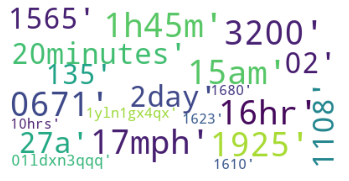

In [ ]:
print(wordcloud2)
fig = plt.figure(1)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
fig.savefig("word2.png", dpi=900)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['united']== True, 'text'], df.loc[df['united']== True, 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 3375
# Test data samples: 376


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['JetBlue']== True, 'text'], df.loc[df['JetBlue']== True, 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 1971
# Test data samples: 220


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['usairways']== True, 'text'], df.loc[df['usairways']== True, 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

#

# Train data samples: 130
# Test data samples: 15


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['SouthwestAir']== True, 'text'], df.loc[df['SouthwestAir']== True, 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 2164
# Test data samples: 241


In [ ]:
X_train.loc[316]

' manage itinerary section website seems broken https://t.co/2pUJvCElNg'

In [ ]:
X_train.loc[241]

' spruce moose!'

In [ ]:
y_train

2689     negative
306      positive
5516      neutral
4886     positive
13872     neutral
           ...   
4392     negative
7088      neutral
2497     negative
14158    negative
5792     negative
Name: airline_sentiment, Length: 13176, dtype: object

In [ ]:
from sklearn.model_selection import KFold
def cv_score(modelrf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        modelrf.fit(X_train, y_train) # fit the classifier, passed is as clf.
        result += scorefunc(modelrf, X_test, y_test) # evaluate score function on held-out data
    return result / nfold # average #KEEP

In [ ]:
from sklearn.model_selection import KFold
def cv_score(modelrf, X, y, scorefunc):
    result = 0.
    print ("Shape:", X.shape, y.shape)
    nfold = 5
    kf = KFold(n_splits=nfold)
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      modelrf.fit(X_train, y_train) # fit the classifier, passed is as clf.
      result += scorefunc(modelrf, X_test, y_test) # evaluate score function on held-out data
    return result / nfold

In [ ]:
print ("Shape:", X.shape, y.shape)

NameError: ignored

In [ ]:
def log_likelihood(modelrf, X, y):
    prob = modelrf.predict_log_proba(X)
    negative = y == 0
    airline_sentiment = ~negative
    return prob[negative, 0].sum() + prob[airline_sentiment, 1].sum()
    #KEEP

In [ ]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(df.shape[0]), train_size=0.7)
mask = np.zeros(df.shape[0], dtype=np.bool)
mask[itest] = True
#KEEP

In [ ]:
len(mask)

14640

In [ ]:
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df.text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (df.airline_sentiment == 'negative' ).values.astype(np.int)
    return X, y

    #get the feature importance 
    #DON"T NEED THIS, already have the x and y train 

In [ ]:
X_train_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
y_train_oh

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train_oh.shape

(13176, 10000)

In [ ]:
y_train_oh.shape

(13176, 3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
best_min_df = 0 # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
maxscore=-np.inf
for alpha in alphas:        
    vectorizer = CountVectorizer(min_df=best_min_df)       
    #Xthis, ythis = make_xy(df, vectorizer)
    Xtrainthis = X_train_oh, #replace with X train one hot encode 
    ytrainthis = y_train_oh, ##replace with Y train one hot encode
    # your turn
    modelrf = MultinomialNB(alpha=alpha)
    #print ("Shape:", Xtrainthis.shape, ytrainthis.shape)
    cvscore = cv_score(modelrf, X_train_oh, y_train_le, log_likelihood)
    if cvscore > maxscore:
        maxscore = cvscore
        best_alpha = alpha

Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
best_min_df = 0 # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
maxscore=-np.inf
for alpha in alphas:        
    vectorizer = CountVectorizer(min_df=best_min_df)       
    #Xthis, ythis = make_xy(df, vectorizer)
    Xtrainthis = X_train_oh, #replace with X train one hot encode 
    ytrainthis = y_train_oh, ##replace with Y train one hot encode
    # your turn
    modelrf = MultinomialNB(alpha=alpha)
    #print ("Shape:", Xtrainthis.shape, ytrainthis.shape)
    cvscore = cv_score(modelrf, X_train_oh, y_train_le, log_likelihood)
    if cvscore > maxscore:
        maxscore = cvscore
        best_alpha = alpha

Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)
Shape: (13176, 10000) (13176,)


In [ ]:
print(f"alpha: {best_alpha}")
print(f"max score: {maxscore}")
print(f"min_df: {best_min_df}")
#alpha: 10
#max score: -4825.833239288538
#min_df: 0

alpha: 1
max score: -3076.440814355721
min_df: 0


In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

modelrf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = modelrf.score(xtrain, ytrain)
test_accuracy = modelrf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
#Accuracy on training data: 0.727231
#Accuracy on test data:     0.704625

#vectorizer the text and then run through it the random forest 

Accuracy on training data: 0.883880
Accuracy on test data:     0.787959


In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

modelrf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = modelrf.score(xtrain, ytrain)
test_accuracy = modelrf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
#Accuracy on training data: 0.727231
#Accuracy on test data:     0.704625

#vectorizer the text and then run through it the random forest 

Accuracy on training data: 0.887295
Accuracy on test data:     0.792642


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, modelrf.predict(xtest)))

[[2009 1789]
 [ 384 6066]]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, modelrf.predict(xtest)))

[[2071 1748]
 [ 377 6052]]


In [ ]:
print(confusion_matrix(ytest, modelrf.predict(xtest)))

[[ 854 2976]
 [  51 6367]]


In [ ]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = modelrf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("positive\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

print("negative\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

positive	     P(fresh | word)
               vegas 0.46
               route 0.46
              austin 0.45
              thanks 0.41
             amazing 0.41
             awesome 0.38
                love 0.37
  destinationdragons 0.36
               great 0.31
               thank 0.26
negative	     P(fresh | word)
               hours 0.95
                hold 0.94
               worst 0.93
             delayed 0.92
                hour 0.92
                told 0.92
                  no 0.91
             luggage 0.90
           cancelled 0.90
                call 0.90


In [ ]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = modelrf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("positive\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

print("negative\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

positive	     P(fresh | word)
               thank 0.15
               daily 0.13
               sweet 0.11
              dragon 0.11
     flyingitforward 0.11
            favorite 0.11
              avgeek 0.10
                 win 0.10
               kudos 0.09
             worries 0.09
negative	     P(fresh | word)
               worst 0.99
          ridiculous 0.97
                paid 0.97
                fail 0.97
        unacceptable 0.97
              answer 0.96
              tarmac 0.96
                lack 0.96
                  40 0.96
                cust 0.96


In [ ]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = modelrf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("positive\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

print("negative\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

positive	     P(fresh | word)
             atlanta 0.14
                fort 0.13
               event 0.13
              avgeek 0.13
     flyingitforward 0.13
          definitely 0.13
            passbook 0.13
             dragons 0.13
             amazing 0.12
           following 0.07
negative	     P(fresh | word)
               worst 0.99
               hours 0.98
            terrible 0.97
              broken 0.97
                been 0.97
        unacceptable 0.97
                fail 0.96
        disappointed 0.96
                lack 0.96
          ridiculous 0.96


In [ ]:
X_train

<4392x546 sparse matrix of type '<class 'numpy.longlong'>'
	with 28564 stored elements in Compressed Sparse Column format>

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape,y_tr

In [ ]:
from sklearn.naive_bayes import MultinomialNB
vectorizer = CountVectorizer(min_df= 50)
X, y = make_xy(df, vectorizer)
X_train =X[mask]
y_train=y[mask]
X_test=X[~mask]
y_test=y[~mask]
print(X_train.shape, y_train.shape, X_test.shape,y_train.shape)
modelrf = MultinomialNB(alpha=best_alpha).fit(X_train,y_train) #predict the model 
y_test_predict_modelrf = modelrf.predict(X_test)
#your turn. Print the accuracy on the test and training dataset
y_train_predict_modelrf = modelrf.predict(X_train)
#training_accuracy = modelrf.score(y_train,y_train_predict_modelrf)
#test_accuracy = modelrf.score(y_test, y_test_predict_modelrf)

#print("Accuracy on training data: {:2f}".format(training_accuracy))
#print("Accuracy on test data:     {:2f}".format(test_accuracy))

(4392, 546) (4392,) (10248, 546) (4392,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
vectorizer = CountVectorizer(min_df= 50)
X, y = make_xy(df, vectorizer)
X_train =X[mask]
y_train=y[mask]
X_test=X[~mask]
y_test=y[~mask]
print(X_train.shape, y_train.shape, X_test.shape,y_train.shape)
modelrf = MultinomialNB(alpha=best_alpha).fit(X_train,y_train) #predict the model 
y_test_predict_modelrf = modelrf.predict(X_test)
#your turn. Print the accuracy on the test and training dataset
y_train_predict_modelrf = modelrf.predict(X_train)
#training_accuracy = modelrf.score(y_train,y_train_predict_modelrf)
#test_accuracy = modelrf.score(y_test, y_test_predict_modelrf)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

(4392, 546) (4392,) (10248, 546) (4392,)
Accuracy on training data: 0.887295
Accuracy on test data:     0.792642


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#vectorizer = CountVectorizer(min_df= 50)
X, y = make_xy(df)
X_train =X[mask]
y_train=y[mask]
X_test=X[~mask]
y_test=y[~mask]
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)
modelrf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train) #predict the model 
y_test_predict_modelrf = modelrf.predict(X_test)
#your turn. Print the accuracy on the test and training dataset
y_train_predict_modelrf = modelrf.predict(X_train)
training_accuracy = accuracy_score(y_train,y_train_predict_modelrf)
test_accuracy = accuracy_score(y_test, y_test_predict_modelrf)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

(4392, 14229) (4392,) (10248, 14229) (10248,)
Accuracy on training data: 1.000000
Accuracy on test data:     1.000000


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
len(mask)

14640

In [ ]:
training_accuracy = accuracy_score(y_train,y_train_predict_modelrf)
test_accuracy = accuracy_score(y_test, y_test_predict_modelrf)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 1.000000
Accuracy on test data:     1.000000


In [ ]:
print(y_train_predict_modelrf.shape)

(4392,)


In [ ]:
training_accuracy = modelrf.score(y_train,y_train_predict_modelrf)

ValueError: ignored

In [ ]:
modelrf.score?

In [ ]:
training_accuracy = modelrf.score(X_train, y_train)
test_accuracy = modelrf.score(X_test, y_test)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 1.000000
Accuracy on test data:     1.000000


In [ ]:
modelrf

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
y_train

7663     negative
6974      neutral
1653      neutral
942      negative
14115    negative
           ...   
7206     positive
4999     negative
3868     positive
10113    negative
6611     positive
Name: airline_sentiment, Length: 13176, dtype: object

In [ ]:
roc_auc_score(y_test_oh,prediction_test_lg )

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            #'max_features': [.1, .2, .3, ],
            'max_depth': [5,10, 20, 30],
            'n_estimators': [10, 50, 100, 300, 500]
        },
    
        cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_test_oh, y_test_oh)
best_params = grid_result.best_params_

In [121]:
print(best_params)
#max depth how deep it goes 
#n estimators how trees within the forest 

{'max_depth': 20, 'n_estimators': 300}


In [122]:
best_rf = RandomForestClassifier(max_depth= 20, n_estimators= 300)

In [123]:
modelrf = RandomForestClassifier(max_depth= 20, n_estimators= 300)
# Train the model on training data
modelrf.fit(X_train_oh, y_train_oh)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 13982 to 2315
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
 2   airline            14640 non-null  object
 3   VirginAmerica      14640 non-null  bool  
 4   AmericanAir        14640 non-null  bool  
dtypes: bool(2), object(3)
memory usage: 486.1+ KB


In [ ]:
import numpy as np

In [ ]:
np.identity()

In [ ]:
prediction_test = modelrf.predict(X_test_oh)

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5660133547254749

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5365396732997603

In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_oh)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data



[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] [[0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
modelrf2 = RandomForestClassifier(max_depth= 30, n_estimators= 300)
# Train the model on training data
modelrf.fit(X_train_oh, y_train)

KeyboardInterrupt: ignored

In [ ]:
modelrf.fit(X_train_oh, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = sm.add_constant(x)

In [ ]:
model = sm.OLS(X_train_oh, y_train)

NameError: ignored

In [ ]:
results = model.fit()


In [ ]:
results.params

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
rounded_labels=np.argmax(prediction_test, axis=1)
rounded_labels[1]

0

In [ ]:
confusion_matrix(y_test,rounded_labels)

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
#Print the prediction accuracy
print ("mean_squared_error = ", mean_squared_error(y_test_oh, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data
#One amazing feature of Random forest is that it provides us info on feature importances

# get the r2 
#mean2 squared error

mean_squared_error =  0.21357012


In [ ]:
print(best_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
from sklearn.metrics import R2
from sklearn.metrics import mean_squared_error

ImportError: ignored

In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))


R2 score -0.18910403698116732
RMSE 0.46164355


In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))

NameError: ignored

In [ ]:
print(grid_result.best_score_)


0.8060113368460916


In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

gsc = GridSearchCV(
        estimator=GradientBoostingClassifier(),
        param_grid={
            #'max_features': [.1, .2, .3, ],
            'max_depth': [1,3,5,7],
            'n_estimators': [500, 750, 1000]
        },
    
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result1 = gsc.fit(X_train_oh, y_train)
best_params1 = grid_result1.best_params_

#creating Scoring parameter: 
#scoring = {'accuracy': make_scorer(accuracy_score),
           #'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

TerminatedWorkerError: ignored

In [ ]:
print(best_params)
#max depth how deep it goes 
#n estimators how trees within the forest 

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

identity matrix

In [ ]:
import numpy as np


In [ ]:
X_test

6477      think flight 1945 BNA LAX get ground tomorrow...
6381      It seems odd sitting plane gets delayed find ...
10989     that's incorrect. Four people, last flight ni...
2676      we're sitting UA1088 getting delayed operatio...
5255                       wait bags longer actual flight.
                               ...                        
10        know suicide second leading cause death among...
5667      Cancelled Flighting flights 45 minutes takeof...
3846      There no excuse leaving minor spend night sob...
2438      able get seat earlier flight sfo ind. Can add...
8110     Lines may extra long security slow, seems empl...
Name: text, Length: 1464, dtype: object

In [ ]:
X_train # follow what they did for x train and y train in the N Bayes homework 

9550      Cancelled Flights flight Tampa Philadelphia t...
2824      besides fact one week ago delayed 18 hours. n...
679      .Thnx response  bot. It seems 'improvement' co...
379       Just bought tix ATX Dallas route thanks addin...
6997     “: Our fleet's fleek. http://t.co/4LlWi5oxvO” ...
                               ...                        
4101      I'm 0/3 Flight Booking Problems without major...
9967                  update passbook passes gate changes.
10243     Sounds like  planned better since weather no ...
1082      since bulkhead seats cannot bags floor, reser...
636       It's incredibly easy fix, would rather stay c...
Name: text, Length: 13176, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df

text  ...                                    text_lemmatized
7525    flight Orlando unable serve hot bevies.... So...  ...  [@JetBlue, flight, to, Orlando, is, unable, to...
12341   ok. There no one airport helping us. Another ...  ...  [@AmericanAir, ok., There, is, no, one, at, th...
1031                                yes, said took hour!  ...  [@united, @FlyEIA, yes,, they, said, it, took,...
3010           no wifi flight ua688. SF ORD. Really? Wow  ...  [@united, no, wifi, on, flight, ua688., SF, to...
13311   No. told got put another flight would get ema...  ...  [@AmericanAir, No., I, wa, told, I, got, put, ...
...                                                  ...  ...                                                ...
13467             Will 2396 Cancelled Flightled tonight?  ...  [@AmericanAir, Will, 2396, be, Cancelled, Flig...
12030   want speak human being! !! This not obscene r...  ...  [@AmericanAir, I, want, to, speak, to, a, huma...
9750     control stupidity not room plane come in. Yo...  ...  [@USAirways, @PHLAirport, we, don't, control, ...
10724    make purchase, take money reservation...Explain  ...  [@USAirways, how, can, I, make, a, purchase,, ...
4452   : #VIPLiveintheVieyard first time tried redeem...  ...  [@SouthwestAir:, #VIPLiveintheVieyard, -, firs...

[14640 rows x 10 columns]

In [ ]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test.shape[0])
probs = modelrf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good words\t     P(airline_sentiment | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(airline_sentiment | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

ValueError: ignored

In [ ]:
df

text  ... SouthwestAir
14570   really hope departs. They said catering servi...  ...        False
13726   thanks following up. think fair refund ticket...  ...        False
12363    #Boo! Wack ass terminal . No food. No lounge...  ...        False
10155   customer service joke. First mechanical Cance...  ...        False
7662    thank you! know weather #Boston great. Everyo...  ...        False
...                                                  ...  ...          ...
4389    great de boarding perfectly plane shot. Fml. ...  ...         True
198     stink. Flight Cancelled Flighted PSP JFK no n...  ...        False
9605                We take Late Flight whole new level!  ...        False
11918   near gate mean sitting plane almost hours, yeah.  ...        False
4263       costumer service sucks! Waiting week response  ...        False

[14640 rows x 9 columns]

In [ ]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test.shape[1])
probs = #randomforest# .predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

    
print("Bad words\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

SyntaxError: ignored